# Deep Neural Networks [NN2]

# 1. Why ANN Fails in Vision Tasks

Problem!

ANN is full connected newtork that mean that `each neuron` is connected with `all after neurons` and `all before neurons` that are `more processing` and get `more neurons`.. consists of number of `dense layers`

solve! 

Deep neuron network that contian  new topic called `feature extraction` that show which `important features` and `less important features`

First `3 lines are ANN` and other `5 layers are DNN`:
!["dnn1.png"](imgs/dnn1.png)

Network consists of `two networks`: 
!["dnn2.png"](imgs/dnn2.png)

+ CNN network:

    - in the `down` network layer are `#7 is as input layer`

    - in the `middel` network layer are `4 hidden layers` for number of process on input layer

+ ANN network:

    - then in `top` network layer is `3 layers` are ANN or `dense layers` which are fully connected network

# 2-Image Masking and Color Tracking

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

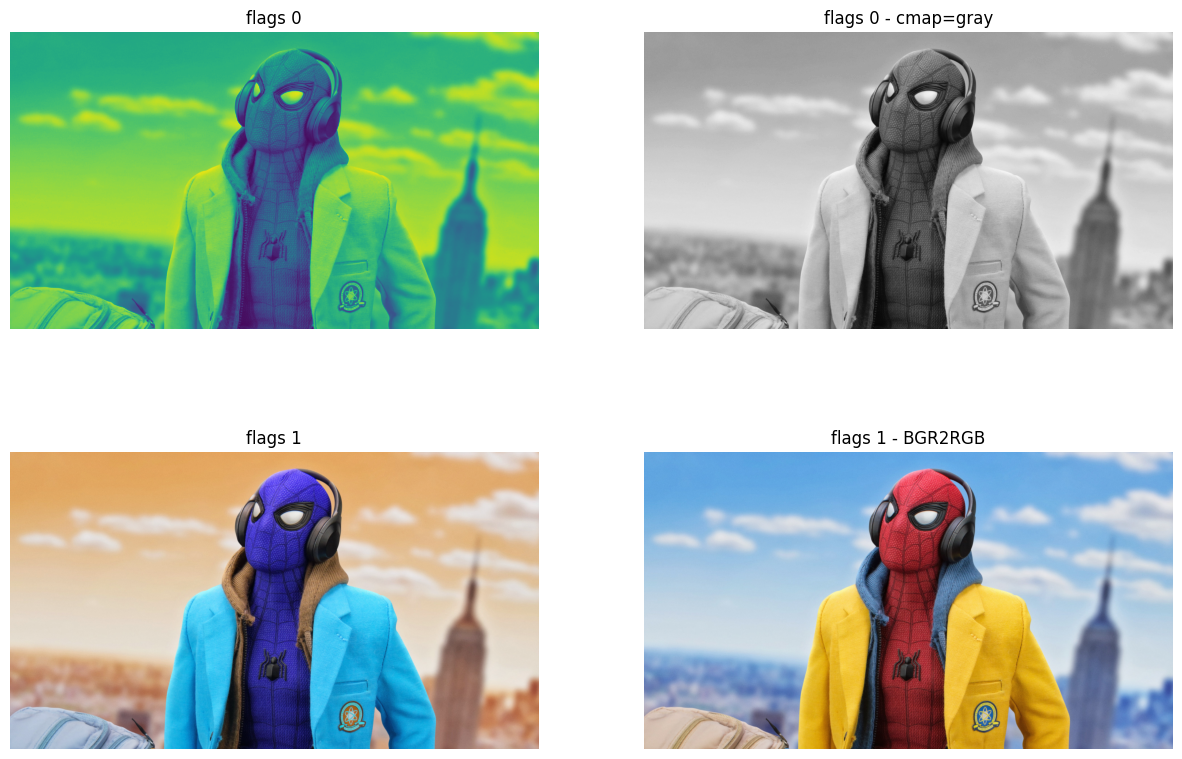

In [39]:
gray_img = cv2.imread('test1.jpg', 0) # 1 channel
bgr_img = cv2.imread('test1.jpg', 1) # 3 channel

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0][0].imshow(gray_img)
axes[0][0].set_title("flags 0")
axes[0][0].axis('off')

axes[0][1].imshow(gray_img, cmap='gray')
axes[0][1].set_title("flags 0 - cmap=gray")
axes[0][1].axis('off')

axes[1][0].imshow(bgr_img)
axes[1][0].set_title("flags 1")
axes[1][0].axis('off')

axes[1][1].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_RGB2BGR))
axes[1][1].set_title("flags 1 - BGR2RGB")
axes[1][1].axis('off')
plt.show()

image shape

In [41]:
print(f"one-dimension {gray_img.shape}")
print(f"Three-dimension {bgr_img.shape}")

one-dimension (2112, 3756)
Three-dimension (2112, 3756, 3)


In [46]:
gray_img = np.zeros_like(gray_img) # two-dimension
print(gray_img)
gray_img.ndim

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


2

In [47]:
bgr_shape = np.zeros_like(bgr_img) # three dimension
print(bgr_shape)
bgr_shape.ndim

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


3

addation

In [2]:
# uint8 is 8 ones with one-dimension
a=np.uint8(150)
b=np.uint8(200)
cv2.add(a,b)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'add'
> Overload resolution failed:
>  - src1 is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src1'


Subtract

In [3]:
# uint8 is 8 ones with one-dimension
a=np.uint8(150)
b=np.uint8(200)
cv2.subtract(a,b)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'subtract'
> Overload resolution failed:
>  - src1 is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src1'


color tracking

!['hsv'](imgs/hsv.png)

In [6]:
cap = cv2.VideoCapture(0) # camera labtop, if video file (video.mp4)
while(1):
    ret, frame = cap.read()
    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_limit = np.array([100, 0, 0])
        upper_limit = np.array([130, 255, 255])
        mask = cv2.inRange(hsv, lower_limit, upper_limit) # color white for object other black 
        res = cv2.bitwise_and(frame, frame, mask=mask)
        
        cv2.imshow('Mask', mask)
        cv2.imshow('Original', frame)
        cv2.imshow('Bit And', res)
        
        if cv2.waitKey(10) & 0XFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3-Image Resizing Techniques

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Bed of Nails

!['bed_of_nails'](imgs/bed_of_nails.png)

Nearst Neibors

!['nearst_neibors'](imgs/nearst_neibors.png)

Problem

!['nearst_neibors_problem'](imgs/nearst_neibors_problem.png)

Bilinear

!['bilinear'](imgs/bilinear.png)

Resizing Techs

!['cubic'](imgs/cubic.png)

Need four points to find one point (black)

# 4-Linear Transformation on images

Want to change scale of vector

!["vector1"](imgs/vector1.png)

to this points

!["vector2"](imgs/vector2.png)

result

!["vector3"](imgs/vector3.png)

# 5. Generate Our Own Data and 6. Loading And Preprocessing

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read Frames form camera

Save frame with name of person

Train (Class 1 , Class 2)
Test (Class 1 , Class 2)

In [3]:
os.mkdir('Train')
os.mkdir('Test')

In [5]:
user = input('PLease Enter Ur Name: ')
os.mkdir('Train/'+user)
os.mkdir('Test/'+user)
cap = cv2.VideoCapture(0)
count = 0
while(1):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
        if cv2.waitKey(10) & 0XFF == ord('s'):
            count +=1
            cv2.imwrite('Train/'+user+'/'+str(count)+'.jpg', frame)
        if cv2.waitKey(10) & 0XFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

show images path

In [ ]:
os.listdir('Train/elsayed')

Read images

In [ ]:
def read_imgs(path):
    img_lst = []
    for img_path in os.listdir(path):
        img = cv2.imread(path + img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (225,225))
        img = img / 255 # normlization 
        # print(img.shape) 
        # plt.imshow(img)
        # break
        img_lst.append(img)
        return img_lst
    
img_lst1 = read_imgs('Train/elsayed')
img_lst1

# 7. Training Our Model

In [1]:
import numpy as np

In [ ]:
x_train = None
y_train = None
x_test = None
y_test = None

In [4]:
from tensorflow.keras import models, layers, utils, optimizers, losses

In [ ]:
y_train = utils.to_categorical(x_train, 
                               num_classes=2)
y_test = utils.to_categorical(x_test, 
                              num_classes=2)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(
    64,
    padding='same',
    strides=1,
    activation='relu', # (0,x)
    input_shape= (x_train[0].shape)
))
model.add(layers.MaxPool2D((2,3)))

model.add(layers.Conv2D(
    32,
    padding='same',
    strides=1,
    activation='relu', # (0,x)
))
model.add(layers.MaxPool2D((2,3)))

model.add(layers.Flatten())

model.add(layers.Desnse(128, activation='relu'))
model.add(layers.Desnse(32, activation='relu'))
model.add(layers.Desnse(2, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer=optimizers.Adam(),
              loss= losses.categorical_crossentropy,
              metrics= ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

In [ ]:
preds = model.predict(x_test) # return [0.3 0.7]
# np.round(model.predict(preds)) return [0 1]
# argmax return the maximum number of predictions
preds = np.argmax(np.round(model.predict(preds)), axis=1) # return 1

In [ ]:
model.save('cnn_model.h5')

# 8. Inference

In [7]:
import numpy as np
from tensorflow.keras import models


In [ ]:
model = models.load_model('cnn_model.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while 1:
    ret, frame = cap.read()
    if ret:
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = cv2.resize((255,255))
        img = img / 255
        img = img.reshape(1,255,255, 3)
        preds = model.predict(img)
        preds = np.argmax(np.round(preds), axis=1) # return 1
        if preds == 0:
            text = 'Class A'
        if preds == 1:
            text = 'Class B'
        print(text)
        cv2.putText(frame, 
                    text, 
                    (100, 100), 
                    1, 
                    3, 
                    (255, 0, 255), 
                    2, 
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
cap.release()
cv2.destoryAllWindows()

# 9  Why ANN fails in NLP Tasks

+ Why ANN fail ?
    - can't understand word `not` such as `i am not happy`
    - not found `Feature Extraction`
    - CNN can but with one dimension and other details.

# 10  Embedding Layer

+ Type of vectorization which convert text to vector
+ get the best vector on your own dataset
+ parameters:
    - vocab size : unique words
    - emb size : size of distance between two words
    - sequence length : max length of sentences 
        - such as more than 10 then we cut the sentence length
        - such as less then 10 then we make padding with zeros of sentences

# 11  Recurrent Neural Networks

+ for 
    - Text classification
    - image classification
    - sequence 2 sequence
    - text generation

+ RNN make feature extraction such as CNN
    - !['rnn1'](imgs/rnn1.png)
    - in left side: one unit
    - in right side: more unit such as 16 units

+ cell 1 return ht-1 and xt, xt enter into cell 2
+ tanh functoin make `nonlinearity` and descrease vanishing
+ In RNN use tanh more than sigmoid function
    - !['rnn2'](imgs/rnn2.png)

+ final result 
    - y = w * h * y * ht 
    - ht is final result from final ce ll

+ RNN is good in small sentences
+ RNN has problem in large sentences such as `long term dependencies` which make problems `Vanishing gradient` and `Exploding gradient`

# 12  Long Short Term Memory

+ Exploding gradient: Big changing in accuracy of prediction.
+ Vanishing gradient: Stable changing in accuracy of prediction and value is zeros
    - multi feature in less weights 
+ LSTM is from RNN's family 
+ To solve problems `Exploding gradient` and `Vanishing gradient`:
    - Ability for Forget : less important features
    - Ability for memorize : more important features

+ LSTM is sum of `Gating`
    - !["12.1"](imgs/12.1.png)
+ Gating:
    - Forget : Filtering features with values between zero or one value
        - zero for remove word or forget 
        - one for pass word 
        - any value between 0 and 1 will determine importance of word 
            - less importance will take small value
            - more importance will take large value
        - !["12.2"](imgs/12.2.png)
        - finally that `Forget Gat or Ft` is applying `sogmoid` on `Xt and Ht -1`
        - Ability to `Forget`
        - ----------------
    - Input gat
        - `xt and ht - 1` will enter into `sigmoid` functoin (like RNN) and return info then pass trough `tanh` functoin which will get all probabilities between -1 and 1
        - `tanh` make LSTM `Ability to Memorize`
        - `Sigmoid` make filteration for features 
        - !["12.3"](imgs/12.3.png)
        - -----------
    - Output gat  
        - imporove output of `Ct` through `tanh` functoin 
        - `tanh` better than `Sigmoid` and not make zeros for values such as `sigmoid`
        - !["12.4"](imgs/12.4.png)

+ `GRU` is better than `LSTM` and them are from RNN's family
+ !["12.5"](imgs/12.5.png)


# 13. Poem Text Generation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [9]:
text = open("shakespeare.txt").read().splitlines()
text

['THE SONNETS',
 '',
 'by William Shakespeare',
 '',
 'From fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,',
 'His tender heir might bear his memory:',
 'But thou contracted to thine own bright eyes,',
 "Feed'st thy light's flame with self-substantial fuel,",
 'Making a famine where abundance lies,',
 'Thy self thy foe, to thy sweet self too cruel:',
 "Thou that art now the world's fresh ornament,",
 'And only herald to the gaudy spring,',
 'Within thine own bud buriest thy content,',
 "And tender churl mak'st waste in niggarding:",
 'Pity the world, or else this glutton be,',
 "To eat the world's due, by the grave and thee.",
 '',
 'When forty winters shall besiege thy brow,',
 "And dig deep trenches in thy beauty's field,",
 "Thy youth's proud livery so gazed on now,",
 'Will be a tattered weed of small worth held:  ',
 'Then being asked, where all thy beauty lies,',
 'Where all the treasure of thy lu

 fit tokenizer on text

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text) 

return unique words

In [27]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

3211

add +1 because `index of zero` and `tokenizer count of one`

In [35]:
tokenizer.word_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

i don't want to insted list of words, i want to one list so add [0]

In [28]:
tokenizer.texts_to_sequences([text[5]])

[[8, 877, 132, 348, 100, 154, 194]]

In [29]:
tokenizer.texts_to_sequences([text[5]])[0]

[8, 877, 132, 348, 100, 154, 194]

apply sequence 

In [30]:
# [ 0 0 0 0 0 3 4 55 63 6 98 0 ]
input_sequence = []
for sent in text:
    sequence = tokenizer.texts_to_sequences([sent])[0]
    for j in range(1, len(sequence)):
        # apply ngram
        ngram = sequence[: j+1]
        input_sequence.append(ngram)

N-grams are contiguous sequences of n items (characters, words, or tokens) in a text. They are widely used in natural language processing (NLP) for various tasks such as text generation, language modeling, and feature extraction. Here's an example of how n-grams work in NLP:

Let's say we have the following sentence:

"Natural language processing is fascinating."

We can generate different n-grams from this sentence. Here are some examples:

1. **Unigrams (1-grams)**: Individual words
   - "Natural", "language", "processing", "is", "fascinating"

2. **Bigrams (2-grams)**: Sequences of two adjacent words
   - "Natural language", "language processing", "processing is", "is fascinating"

3. **Trigrams (3-grams)**: Sequences of three adjacent words
   - "Natural language processing", "language processing is", "processing is fascinating"

4. **4-grams (4-grams)**: Sequences of four adjacent words
   - "Natural language processing is", "language processing is fascinating"

N-grams help capture local word dependencies and statistical properties of the language. They are often used in tasks such as text prediction, machine translation, and sentiment analysis in NLP.

In [31]:
max_len = max([len(i) for i in input_sequence])
max_len

11

In [32]:
input_sequence = pad_sequences(input_sequence, maxlen=max_len)
input_sequence

array([[   0,    0,    0, ...,    0,    2, 1373],
       [   0,    0,    0, ...,    0,   31, 1374],
       [   0,    0,    0, ...,   31, 1374, 1375],
       ...,
       [   0,    0,    0, ...,    0, 1372, 3208],
       [   0,    0,    0, ..., 1372, 3208, 3209],
       [   0,    0,    0, ...,    0, 1372, 3210]])

In [33]:
inputs = input_sequence[:, :-1] # not including last column
labels = input_sequence[: , -1] 

convert labels for to categorical

In [34]:
labels = to_categorical(labels, num_classes= vocab_size)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Build model

In [39]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 
                           100, 
                           input_length=max_len-1)) # +1 which added
model.add(layers.LSTM(128, 
                      return_sequences=True)) # return all Ht
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128)) # another for more deep LSTM
model.add(layers.Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321100    
                                                                 
 lstm_2 (LSTM)               (None, 10, 128)           117248    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 3211)              414219    
                                                                 
Total params: 984151 (3.75 MB)
Trainable params: 984151 (3.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


+ Embedding is 10, 100 :
    - 10 is sequence length
    - 100 is input 
    - 10 is return_sequences= True, so return all Ht of cells 
    - 128 is units 

+  lstm_3 (LSTM) return only 128 because not found `return_sequences=True`

+ dense_1 (Dense)             (None, 3211) vocab size

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history= model.fit(inputs, labels, epochs=10)
history

+ LSTM is slow 